C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

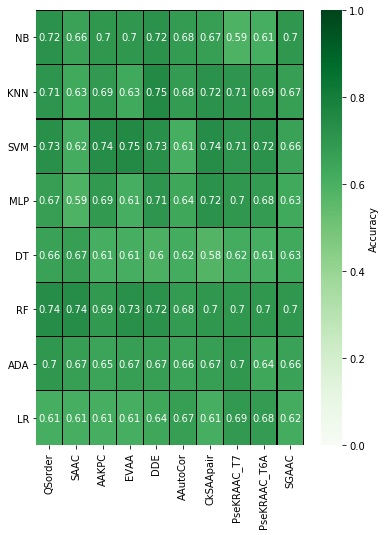

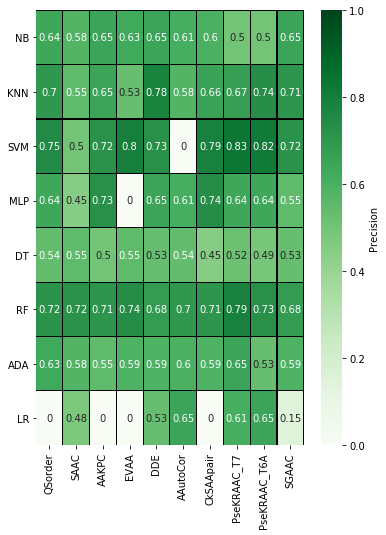

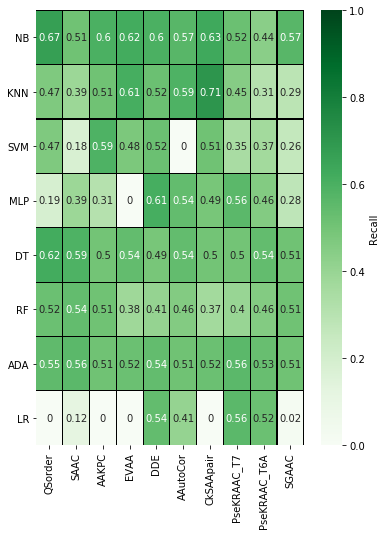

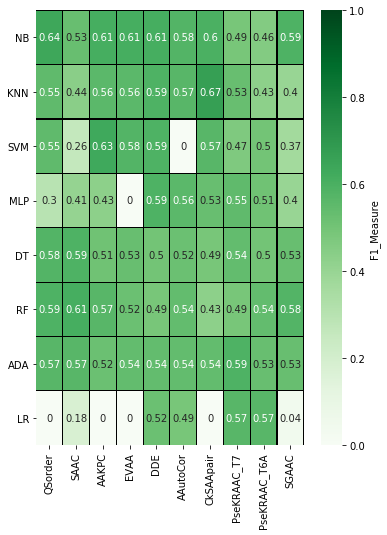

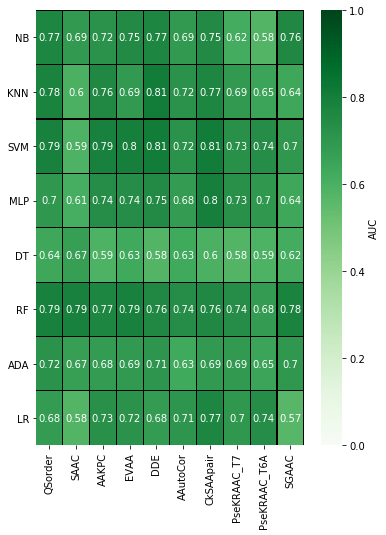

In [1]:
import  pandas  as  pd
import  numpy   as  np
import  seaborn as  sb
import  matplotlib.pyplot as plt
from sklearn.preprocessing      import    StandardScaler  
from  sklearn.naive_bayes       import    GaussianNB
from  sklearn.neighbors         import    KNeighborsClassifier
from  sklearn.svm               import    SVC
from  sklearn.neural_network    import    MLPClassifier
from  sklearn.tree              import    DecisionTreeClassifier
from  sklearn.ensemble          import    RandomForestClassifier
from  sklearn.ensemble          import    AdaBoostClassifier
from  sklearn.linear_model      import    LogisticRegression
from  sklearn.model_selection   import    cross_val_score
from sklearn.metrics            import    accuracy_score
from sklearn.metrics            import    precision_score
from sklearn.metrics            import    recall_score
from sklearn.metrics            import    f1_score
from sklearn.metrics            import    roc_auc_score
###
class  Moonlight_FSH():                        
    def FiletoDF(self, addr):
        myfile = pd.read_csv(addr)
        df     = pd.DataFrame(myfile) 
        dftmp1 = df.drop(['uniprot'], axis=1)
        dftmp2 = dftmp1.drop(['target'], axis=1)
        return  dftmp2 ,df['target']   
        
    def DoFiletoDF(self):
        X_fv=[0]*10
        y_fv=[0]*10
        X_fv[0], y_fv[0] = self.FiletoDF('D:/GitHub-IBB/DATA/QSorder.csv')       
        X_fv[1], y_fv[1] = self.FiletoDF('D:/GitHub-IBB/DATA/SAAC.csv')
        X_fv[2], y_fv[2] = self.FiletoDF('D:/GitHub-IBB/DATA/AAKpartComposition.csv')
        X_fv[3], y_fv[3] = self.FiletoDF('D:/GitHub-IBB/DATA/ExpectedValueAA.csv')
        X_fv[4], y_fv[4] = self.FiletoDF('D:/GitHub-IBB/DATA/DDE.csv')
        X_fv[5], y_fv[5] = self.FiletoDF('D:/GitHub-IBB/DATA/AAutoCor.csv')
        X_fv[6], y_fv[6] = self.FiletoDF('D:/GitHub-IBB/DATA/CkSAApair.csv')
        X_fv[7], y_fv[7] = self.FiletoDF('D:/GitHub-IBB/DATA/PseKRAAC_T7.csv')
        X_fv[8], y_fv[8] = self.FiletoDF('D:/GitHub-IBB/DATA/PseKRAAC_T6A.csv')
        X_fv[9], y_fv[9] = self.FiletoDF('D:/GitHub-IBB/DATA/SGAAC.csv')
        return X_fv, y_fv  
    
    def CreateModel(self):
        NB  = GaussianNB()        
        KNN = KNeighborsClassifier()  
        SVM = SVC()   
        MLP = MLPClassifier()       
        DT  = DecisionTreeClassifier()
        RF  = RandomForestClassifier() 
        ADA = AdaBoostClassifier()
        LR  = LogisticRegression()
        lstcm = [NB, KNN, SVM, MLP, DT, RF, ADA, LR]
        return lstcm    
       
    def MakeDF(self, mylst):
        Features = ['QSorder', 'SAAC', 'AAKPC', 'EVAA', 'DDE', 'AAutoCor', 'CkSAApair', 'PseKRAAC_T7', 'PseKRAAC_T6A', 'SGAAC']
        Models   = ['NB', 'KNN', 'SVM', 'MLP', 'DT', 'RF', 'ADA', 'LR']
        mydf     = pd.DataFrame(mylst, index=Features, columns=Models)
        rdf      = mydf.T
        return rdf 
    
    def DrawHeatmap(self, mydf, lab, p):
        fig, ax  = plt.subplots(figsize=(6,8))
        hm = sb.heatmap(mydf, ax=ax, cmap="Greens", linewidths=0.1, linecolor='black', annot=True, cbar_kws={'label':lab, 'orientation':'vertical'}, vmin=0, vmax=1) 
        hm.set_xticklabels(hm.get_xticklabels(), rotation=90)
        hm.set_yticklabels(hm.get_yticklabels(), rotation=360)
        fig = hm.get_figure()
        fig.savefig(p)
###        
class  Moonlihght_Classifier_CV(Moonlight_FSH):                                     
    def CrossValidation(self,pX, py, score):
        lst = self.CreateModel()
        k = 10
        NBScore  = round(np.mean(cross_val_score(lst[0], pX, py, scoring=score, cv=k)), 2)    
        KNNScore = round(np.mean(cross_val_score(lst[1], pX, py, scoring=score, cv=k)), 2)           
        SVMScore = round(np.mean(cross_val_score(lst[2], pX, py, scoring=score, cv=k)), 2)    
        MLPScore = round(np.mean(cross_val_score(lst[3], pX, py, scoring=score, cv=k)), 2)
        DTScore  = round(np.mean(cross_val_score(lst[4], pX, py, scoring=score, cv=k)), 2)    
        RFScore  = round(np.mean(cross_val_score(lst[5], pX, py, scoring=score, cv=k)), 2)    
        ADAScore = round(np.mean(cross_val_score(lst[6], pX, py, scoring=score, cv=k)), 2)    
        LRScore  = round(np.mean(cross_val_score(lst[7], pX, py, scoring=score, cv=k)), 2)
        lstmodel = [NBScore, KNNScore, SVMScore, MLPScore, DTScore, RFScore, ADAScore, LRScore]
        return lstmodel    
                       
    def DoCrossValidation(self, Xlst, ylst, mesure):
        fvec =[0]*10
        fvec[0] = self.CrossValidation(Xlst[0], ylst[0], mesure)
        fvec[1] = self.CrossValidation(Xlst[1], ylst[1], mesure)
        fvec[2] = self.CrossValidation(Xlst[2], ylst[2], mesure)
        fvec[3] = self.CrossValidation(Xlst[3], ylst[3], mesure)
        fvec[4] = self.CrossValidation(Xlst[4], ylst[4], mesure)
        fvec[5] = self.CrossValidation(Xlst[5], ylst[5], mesure)
        fvec[6] = self.CrossValidation(Xlst[6], ylst[6], mesure)
        fvec[7] = self.CrossValidation(Xlst[7], ylst[7], mesure)
        fvec[8] = self.CrossValidation(Xlst[8], ylst[8], mesure)
        fvec[9] = self.CrossValidation(Xlst[9], ylst[9], mesure)
        return fvec  
    
    def  CMH(self, a, b, m, t, p):       
        allacc = self.DoCrossValidation(a, b, m)
        dfacc = self.MakeDF(allacc)
        self.DrawHeatmap(dfacc, t, p)
        
    def  final(self,lstX, lsty):
        self.CMH(lstX, lsty, "accuracy",'Accuracy', 'D:/GitHub-IBB/Result/CrossValidation/Accuracy.png')
        self.CMH(lstX, lsty, "precision",'Precision', 'D:/GitHub-IBB/Result/CrossValidation/Precision.png')
        self.CMH(lstX, lsty, "recall",'Recall', 'D:/GitHub-IBB/Result/CrossValidation/Recall.png')
        self.CMH(lstX, lsty, "f1",'F1_Measure', 'D:/GitHub-IBB/Result/CrossValidation/F1.png')
        self.CMH(lstX, lsty, "roc_auc",'AUC',  'D:/GitHub-IBB/Result/CrossValidation/AUC.png')       

###

object = Moonlihght_Classifier_CV()
lstX, lsty = object.DoFiletoDF()
object.final(lstX, lsty)